Interesting generalisations/future directions:
1. d-dimensions
2. Shapes other than square
3. Calculation of entropy, etc. other thermodynamic potentials


In [1]:
import main
import energy
import thermodynamics as td
import numpy as np
import matplotlib.pyplot as plt

# Autocorrelation time measurement

1. Change the temperature discretization interval (where it is 0.01) from 2 to 2.4 to 2 to 3
2. There is a severe issue of incorrect autocorrelation times below the critical temperature. Either find a way to manually fix it, or better still, improve the autocorrelation function to do so (see Wolff.ipynb). 
    - The temporary fix to this problem is by using np.abs() during summing magnetisations
3. Using the dataset generated, try to calculate the critical exponents and such - atleast write the methods for that
4. Then, try doing the following - 64*64 lattices
5. The main script is still very messed up. Its not good code. Rewrite it
6. Discuss the differences in the order parameter (magnetisation) vs temperature plot for varying system sizes.

In [2]:
tau = np.loadtxt("AutoCorr_times.csv") # Code for generating this is in Wolff.ipynb

In [14]:
Temp = np.array(range(1,51))/10 # temperatures in steps of 0.1
Temp1 = np.array(range(200,300))/100 # more dense sampling of temperature around critical value
temp_AC = np.unique(np.append(Temp,Temp1)) # final temperature array
num_samples = 1000

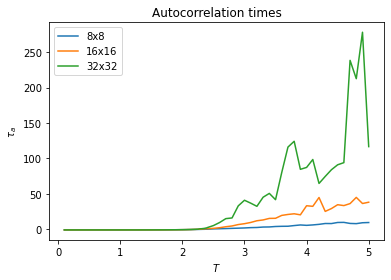

In [4]:
plt.plot(temp_AC,tau[0],label = '8x8')
plt.plot(temp_AC,tau[1],label = '16x16')
plt.plot(temp_AC,tau[2],label = '32x32')
plt.legend()
plt.title("Autocorrelation times")
plt.ylabel(r'$\tau_a$')
plt.xlabel(r'$T$')
plt.show()


## Some observations - 
## 1. Higher the temperature, more the jerky nature of the autocorrelation times - 
# this possibly means that the time series for the magnetisation is very 
## 2. Generally, minus the spikes and dips, higher temperatures translate to higher AC times - 
# this is to be expected because at higher temperatures, clusters consist of a few spins
## 3. Larger lattice sizes lead to higher autocorrelation times - 
# This is because large lattices need more time for effective changes in magnetisation
## Another theoretical fact is that it is not a problem if we overestimate the autocorrelation times

Post processing autocorrelation times

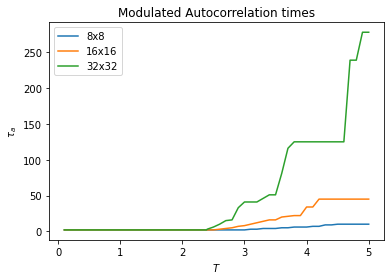

In [5]:
# For all values that are less than 2, we round them up to two. Else, we simply round up to next higher integer. 
# Then, to avoid underestimation of autocorrelation times, we do the following - say we encounter a local maxima 
# - we keep on assigning that value till we hit an index for which the value of tau is higher than the last local maxima. 
# Essentially, build a bridge connecting the maximas.

#### Observation from outputs and plots for N=8, the 2 thing in AC is absolutely terrible ####
#### Suggestion - change the hyper discretization from 2 to 2.4 to 2 to 3 ####

# The following is a sample code for this:
def round_to_2(x):
    for i in range(len(x)):
        if x[i]<2:
            x[i] = 2
    return x

def bridge_maxima(x):
    i = 1
    while i<len(x)-1:
        if x[i]>x[i+1] and x[i]>x[i-1]:
            k = i
            while k< len(x)-1 and x[k] > x[k+1]:
                x[k+1] = x[k]
                k += 1
            i = k
        else: 
            i += 1
    return x

def modulate_AC_time(x):
    
    x = round_to_2(x)
    x = bridge_maxima(x)
    x = np.ceil(x)

    #x = np.ceil(bridge_maxima((np.copy(x)+4).round(2)))
    # Find a better rule than above. Or, rephrase completely how to find
    # Autocorrelation times below criticality
    
    return x

tau_prime_8 = modulate_AC_time(np.copy(tau[0]))
tau_prime_16 = modulate_AC_time(np.copy(tau[1]))
tau_prime_32 = modulate_AC_time(np.copy(tau[2]))

plt.plot(temp_AC,tau_prime_8,label = '8x8')
plt.plot(temp_AC,tau_prime_16,label = '16x16')
plt.plot(temp_AC,tau_prime_32,label = '32x32')
plt.legend()
plt.title("Modulated Autocorrelation times")
plt.ylabel(r'$\tau_a$')
plt.xlabel(r'$T$')
plt.show()

# Data generation using Autocorrelation times

In [ ]:
# Store for N=8,16,32,64 in different cells. Otherwise this will take a LOT of time with no possibility of returns

## Generating for N = 8 lattice ##

equilibriation_time = 300
autocorrelation_times = tau_prime_8
num_samples = 1000 # 1000 samples for each temperature

main.store(size = 8,eq_time= equilibriation_time, 
           AC_time= autocorrelation_times, no_of_samples=num_samples, temperatures = temp_AC)

In [ ]:
## Generating for N = 16 lattice ##
equilibriation_time = 1000
autocorrelation_times = tau_prime_16
num_samples = 1000 # 1000 samples for each temperature

main.store(size = 16,eq_time= equilibriation_time, 
           AC_time= autocorrelation_times, no_of_samples=num_samples, temperatures = temp_AC)

In [11]:
## Generating for N = 32 lattice ##
equilibriation_time = 1000
autocorrelation_times = tau_prime_32
num_samples = 1000 # 1000 samples for each temperature

main.store(size = 32,eq_time= equilibriation_time, 
           AC_time= autocorrelation_times, no_of_samples=num_samples, temperatures = temp_AC)

Storing for N =  32


KeyboardInterrupt: 

# Calculation of Thermodynamic Properties

In [ ]:
mag8,energies8,susc8,spec8 = main.averaging(size=8,no_of_samples=num_samples)

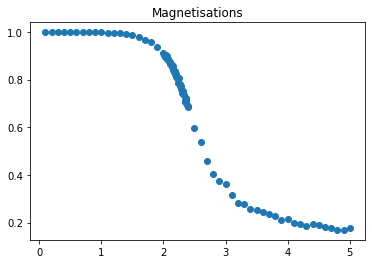

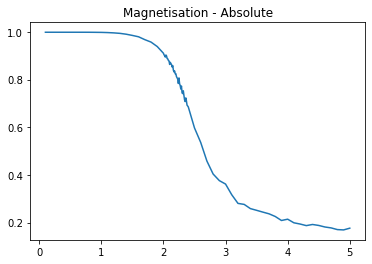

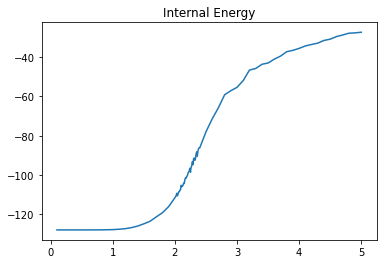

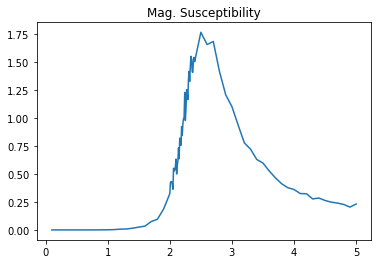

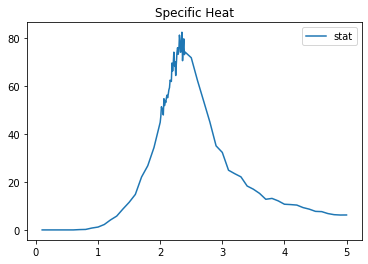

In [7]:
main.plot_stuff(mag8,energies8,susc8,spec8,temp_AC)

In [ ]:
mag16,energies16,susc16,spec16 = main.averaging(size=16,no_of_samples=num_samples)

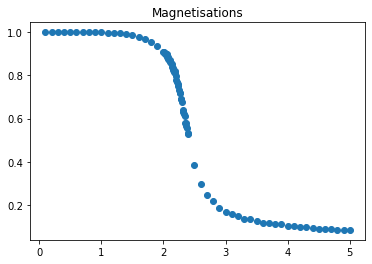

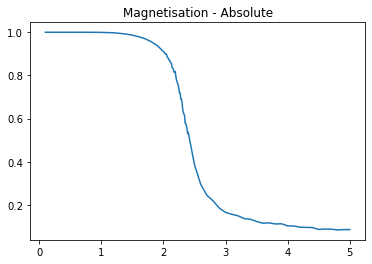

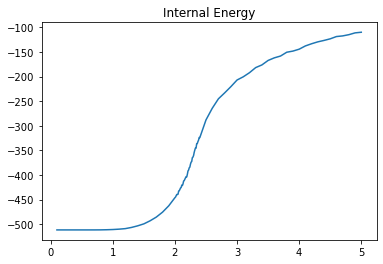

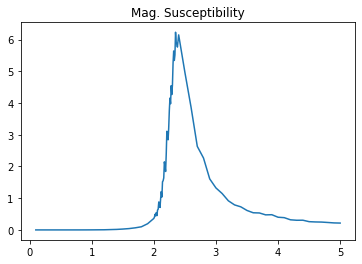

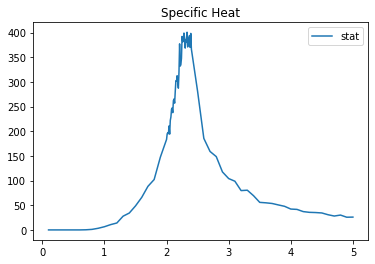

In [9]:
main.plot_stuff(mag16,energies16,susc16,spec16,temp_AC)

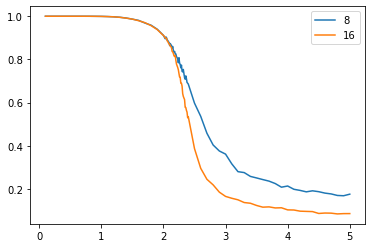

2.5
2.35


In [13]:
plt.plot(temp_AC,mag8,label = '8')
plt.plot(temp_AC,mag16,label='16')
plt.legend()
plt.show()

print(temp_AC[np.argmax(susc8)])
print(temp_AC[np.argmax(susc16)])

# Critical temperature reduces and approaches correct value for increasing system size

In [ ]:
mag32,energies32,susc32,spec32 = main.averaging(size=32,no_of_samples=num_samples)

In [ ]:
main.plot_stuff(mag32,energies32,susc32,spec32,temp_AC)

# Finding $T_c$ and critical exponents

Comment - Do finite size scaling here.

In [ ]:
## Finding Critical Temperature Using Finite Size Scaling ##


# Additional Plots

Comment 1 - 
One can expect the behaviour of the magnetisation plot. Interpret the energy vs temp. plot. 

1. Why constant below Tc?
2. Why jumping at Tc?
3. Why growing, albeit slowly, after Tc?

Comment 1.1 - 
Interesting obeservation - the statistical calculation is much smoother than the differentiation. However, remove the artefact

Comment 1.2 - The spikes that you see if you dont filter the data why are they appearing? - i think the solution is to use a larger equilibriation time for lower temperatures.

In [ ]:
# Equiblibrium distribution of m v/s E in histogram above and below Tc

import seaborn as sb

sb.histplot(data=np.array(mag_below), stat='proportion', binwidth = 0.01, kde=True)
plt.show()
sb.histplot(data=np.array(mag_above), stat='proportion', binwidth = 0.1, kde=True)
plt.show()
sb.histplot(data=np.array(E_below), stat='proportion', binwidth = 10, kde=True)
plt.show()
sb.histplot(data=np.array(E_above), stat='proportion', binwidth = 10, kde=True)
plt.show()



Comment 2 - What is the importance of the mean and variance of these graphs. How do these change with N?

Interesting idea - calculating all important statistical properties - 
1. Entropy
2. Thermodynamic potentials

In [ ]:
# Distributions of magnetisation and energy ##
plt.scatter(E_above,mag_above)
plt.show()
plt.scatter(E_below,mag_below)
plt.show()

# Calculation of 2-point Functions